In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('payment.csv')

In [8]:
print(df.head())
print(df.info())
print(df.isnull().sum())

        Provider            Service_Type          Fee_Structure  \
0           Wise  Digital Money Transfer     Fixed + Percentage   
1  Western Union   Traditional + Digital   Variable by corridor   
2      MoneyGram   Traditional + Digital   Variable by corridor   
3          Swift       Bank Wire Network  Fixed + Correspondent   
4        Remitly  Digital Money Transfer         Tiered Service   

   Fixed_Fee_Min_USD  Fixed_Fee_Max_USD  Percentage_Fee_Min  \
0                0.5                2.0                0.41   
1                5.0               15.0                1.00   
2                4.0               12.0                1.00   
3               15.0               50.0                0.05   
4                0.0                8.0                0.50   

   Percentage_Fee_Max  Speed_Min_Hours  Speed_Max_Hours  Coverage_Countries  \
0                0.62             0.25               24                  80   
1                5.00             0.25              168     

                   Fixed_Fee_Min_USD               Fixed_Fee_Max_USD         \
                                 min    max   mean               min    max   
Provider                                                                      
Azimo                           0.00   0.00   0.00              4.99   4.99   
Currencies Direct               0.00   0.00   0.00              0.00   0.00   
Global Reach                    2.00   2.00   2.00              8.00   8.00   
InstaReM                        0.00   0.00   0.00             15.00  15.00   
MoneyGram                       4.00   4.00   4.00             12.00  12.00   
OFX                             0.00   0.00   0.00              0.00   0.00   
Pangea                          4.99   4.99   4.99              4.99   4.99   
Payoneer                        1.50   1.50   1.50              3.00   3.00   
Paysend                         1.50   1.50   1.50              2.99   2.99   
Remitly                         0.00   0.00   0.00  

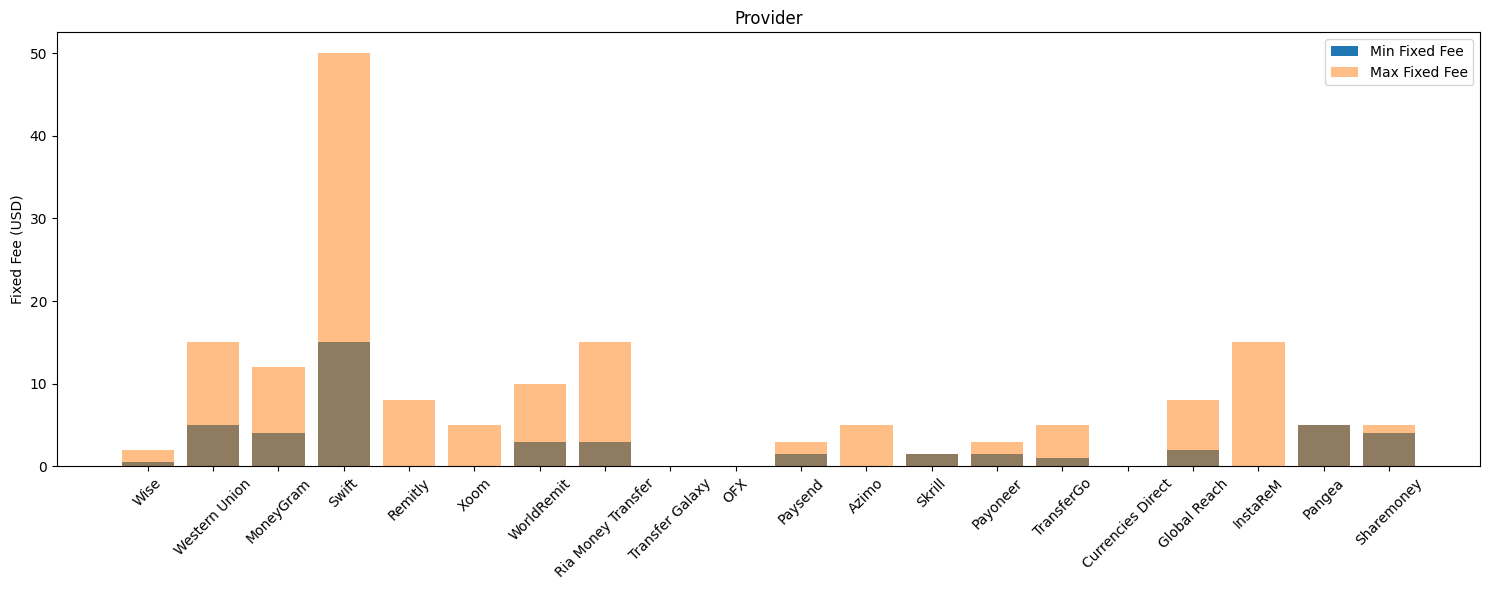

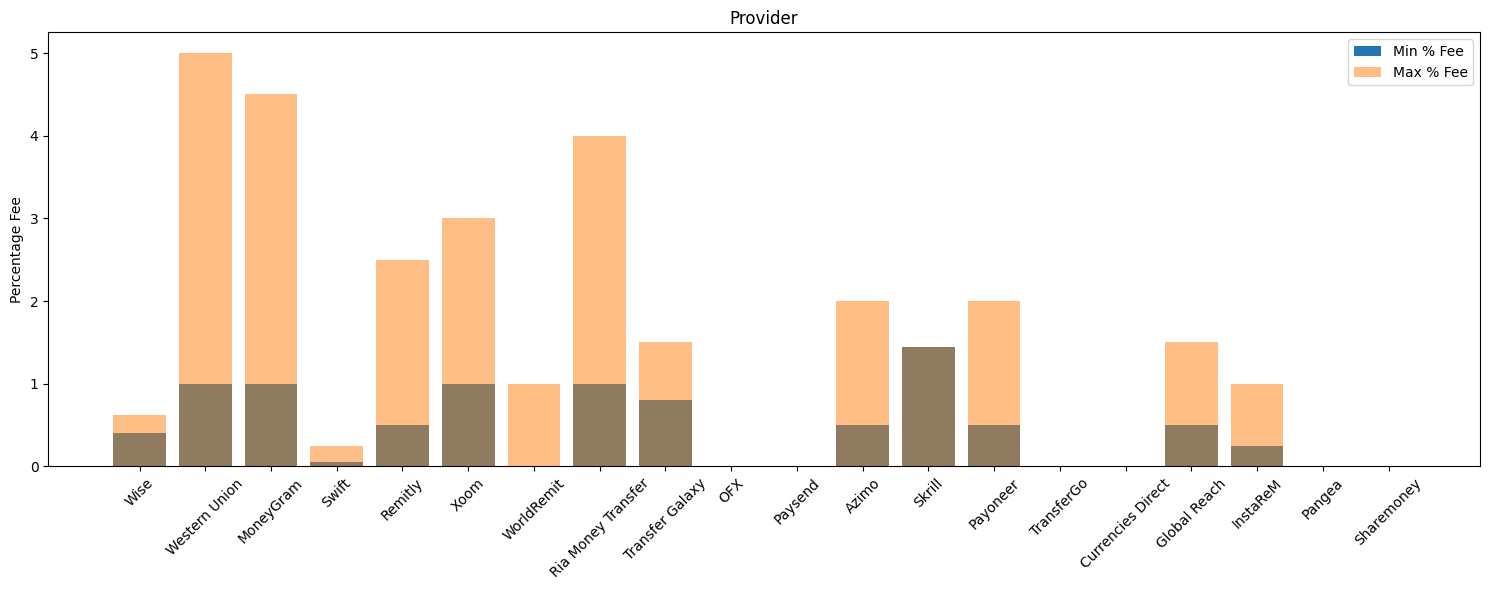

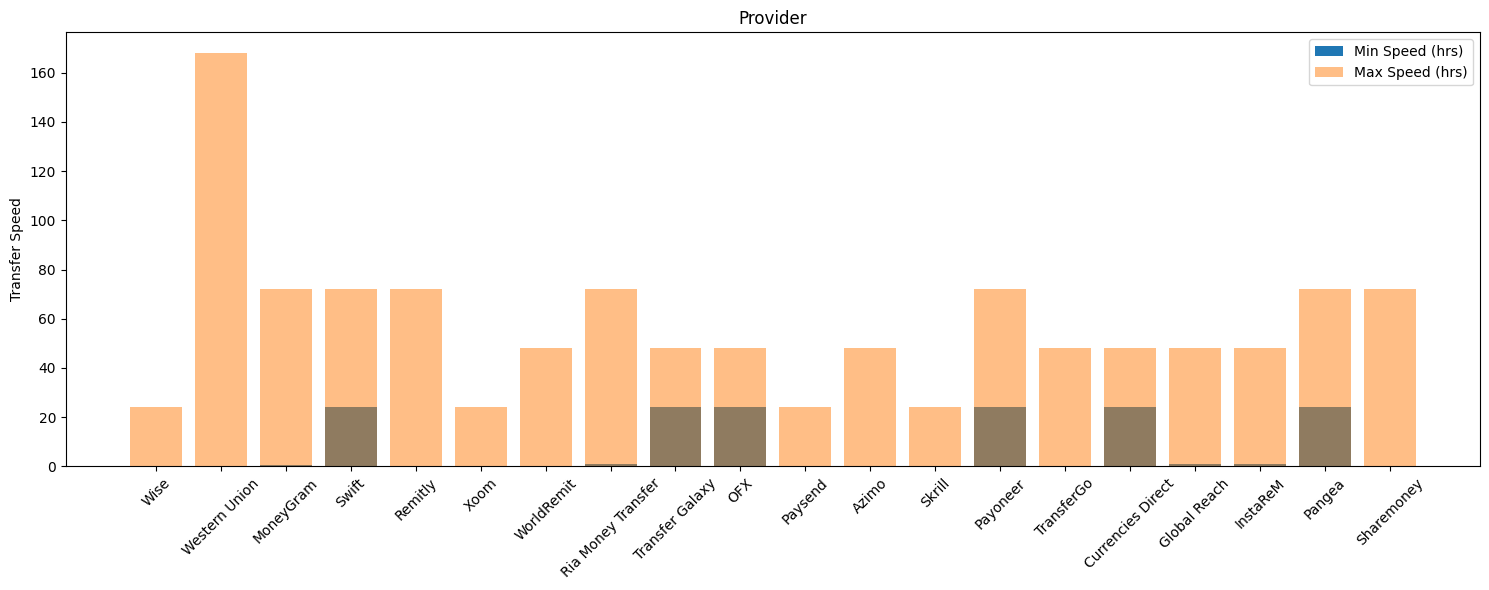

In [9]:
fee_stats = df[['Provider', 'Fixed_Fee_Min_USD', 'Fixed_Fee_Max_USD', 'Percentage_Fee_Min', 'Percentage_Fee_Max']].copy()
speed_stats = df[['Provider', 'Speed_Min_Hours', 'Speed_Max_Hours']].copy()

fee_summary = fee_stats.groupby('Provider').agg(['min', 'max', 'mean'])
speed_summary = speed_stats.groupby('Provider').agg(['min', 'max', 'mean'])

print(fee_summary)

print(speed_summary)

plt.figure(figsize=(15,6))
plt.bar(fee_stats['Provider'], fee_stats['Fixed_Fee_Min_USD'], label='Min Fixed Fee')
plt.bar(fee_stats['Provider'], fee_stats['Fixed_Fee_Max_USD'], alpha=0.5, label='Max Fixed Fee')
plt.xticks(rotation=45)
plt.ylabel('Fixed Fee (USD)')
plt.title('Provider')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,6))
plt.bar(fee_stats['Provider'], fee_stats['Percentage_Fee_Min'], label='Min % Fee')
plt.bar(fee_stats['Provider'], fee_stats['Percentage_Fee_Max'], alpha=0.5, label='Max % Fee')
plt.xticks(rotation=45)
plt.ylabel('Percentage Fee')
plt.title('Provider')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,6))
plt.bar(speed_stats['Provider'], speed_stats['Speed_Min_Hours'], label='Min Speed (hrs)')
plt.bar(speed_stats['Provider'], speed_stats['Speed_Max_Hours'], alpha=0.5, label='Max Speed (hrs)')
plt.xticks(rotation=45)
plt.ylabel('Transfer Speed')
plt.title('Provider')
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
fees = df[['Provider', 'Fixed_Fee_Min_USD', 'Fixed_Fee_Max_USD', 'Percentage_Fee_Min', 'Percentage_Fee_Max']]
fees_array = fees.to_numpy()
print(fees_array)
print(fees_array.shape)
filtered_fees = fees_array[0:, 1:]
filtered_fees_array = np.array(filtered_fees)
filtered_fees_array = filtered_fees_array.astype(np.float64)
mean_fees = np.mean(filtered_fees_array, axis=0)
std_dev = np.std(filtered_fees_array, axis=0)
z = (filtered_fees_array - mean_fees) / std_dev
outlier_mask = np.abs(z) > 3

outlier_rows = filtered_fees_array[np.any(outlier_mask, axis=1)]
print(outlier_rows)
print(z)
df['z_scores'] = z.tolist()
df.loc[df['z_scores'].apply(lambda x: any(abs(i) > 3 for i in x)), 'Outlier'] = True
df['Outlier'] = df['Outlier'].fillna(False)
print(df[['Provider', 'Fixed_Fee_Min_USD', 'Fixed_Fee_Max_USD', 'Percentage_Fee_Min', 'Percentage_Fee_Max', 'z_scores', 'Outlier']])

[['Wise' 0.5 2.0 0.41 0.62]
 ['Western Union' 5.0 15.0 1.0 5.0]
 ['MoneyGram' 4.0 12.0 1.0 4.5]
 ['Swift' 15.0 50.0 0.05 0.25]
 ['Remitly' 0.0 8.0 0.5 2.5]
 ['Xoom' 0.0 4.99 1.0 3.0]
 ['WorldRemit' 2.99 9.99 0.0 1.0]
 ['Ria Money Transfer' 3.0 15.0 1.0 4.0]
 ['Transfer Galaxy' 0.0 0.0 0.8 1.5]
 ['OFX' 0.0 0.0 0.0 0.0]
 ['Paysend' 1.5 2.99 0.0 0.0]
 ['Azimo' 0.0 4.99 0.5 2.0]
 ['Skrill' 1.45 1.45 1.45 1.45]
 ['Payoneer' 1.5 3.0 0.5 2.0]
 ['TransferGo' 0.99 4.99 0.0 0.0]
 ['Currencies Direct' 0.0 0.0 0.0 0.0]
 ['Global Reach' 2.0 8.0 0.5 1.5]
 ['InstaReM' 0.0 15.0 0.25 1.0]
 ['Pangea' 4.99 4.99 0.0 0.0]
 ['Sharemoney' 3.99 4.99 0.0 0.0]]
(20, 5)
[[15.   50.    0.05  0.25]]
[[-0.54831757 -0.59461852 -0.08538226 -0.58088646]
 [ 0.78868003  0.6190792   1.24028973  2.25871478]
 [ 0.49156945  0.33899511  1.24028973  1.93455938]
 [ 3.7597858   3.8867269  -0.89426687 -0.82076145]
 [-0.69687286 -0.03445034  0.11683889  0.63793781]
 [-0.69687286 -0.31546805  1.24028973  0.96209321]
 [ 0.19148777 

C:\Users\USER\AppData\Local\Temp\ipykernel_17648\912597893.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Outlier'] = df['Outlier'].fillna(False)


In [11]:
combinations = df[(df['Fixed_Fee_Min_USD'] > df['Fixed_Fee_Max_USD']) |
                               (df['Percentage_Fee_Min'] > df['Percentage_Fee_Max']) |
                               (df['Speed_Min_Hours'] > df['Speed_Max_Hours'])]
print(combinations[['Provider', 'Fixed_Fee_Min_USD', 'Fixed_Fee_Max_USD', 'Percentage_Fee_Min', 'Percentage_Fee_Max', 'Speed_Min_Hours', 'Speed_Max_Hours']])
median = np.median(filtered_fees_array, axis=0)
mad = np.median(np.abs(filtered_fees_array - median)) * 1.4826
print(filtered_fees_array)
print(median)
print(filtered_fees_array.dtype)
print(f"Median Absolute Deviation {mad:.2f}")

Unrealistic combinations: Empty DataFrame
Columns: [Provider, Fixed_Fee_Min_USD, Fixed_Fee_Max_USD, Percentage_Fee_Min, Percentage_Fee_Max, Speed_Min_Hours, Speed_Max_Hours]
Index: []
Original Data: [[ 0.5   2.    0.41  0.62]
 [ 5.   15.    1.    5.  ]
 [ 4.   12.    1.    4.5 ]
 [15.   50.    0.05  0.25]
 [ 0.    8.    0.5   2.5 ]
 [ 0.    4.99  1.    3.  ]
 [ 2.99  9.99  0.    1.  ]
 [ 3.   15.    1.    4.  ]
 [ 0.    0.    0.8   1.5 ]
 [ 0.    0.    0.    0.  ]
 [ 1.5   2.99  0.    0.  ]
 [ 0.    4.99  0.5   2.  ]
 [ 1.45  1.45  1.45  1.45]
 [ 1.5   3.    0.5   2.  ]
 [ 0.99  4.99  0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 2.    8.    0.5   1.5 ]
 [ 0.   15.    0.25  1.  ]
 [ 4.99  4.99  0.    0.  ]
 [ 3.99  4.99  0.    0.  ]]

Median: [1.475 4.99  0.455 1.225]
float64
Median Absolute Deviation (MAD): 1.65


In [12]:
#normalize using median and mad 
normalized = (filtered_fees_array - median) / mad
print(normalized)

[[-5.92458100e-01 -1.81687151e+00 -2.73442200e-02 -3.67627846e-01]
 [ 2.14196390e+00  6.08256982e+00  3.31168886e-01  2.29387623e+00]
 [ 1.53431457e+00  4.25962182e+00  3.31168886e-01  1.99005157e+00]
 [ 8.21845723e+00  2.73502965e+01 -2.46097980e-01 -5.92458100e-01]
 [-8.96282766e-01  1.82902449e+00  2.73442200e-02  7.74752899e-01]
 [-8.96282766e-01  0.00000000e+00  3.31168886e-01  1.07857757e+00]
 [ 9.20588739e-01  3.03824666e+00 -2.76480446e-01 -1.36721100e-01]
 [ 9.26665233e-01  6.08256982e+00  3.31168886e-01  1.68622690e+00]
 [-8.96282766e-01 -3.03217017e+00  2.09639020e-01  1.67103567e-01]
 [-8.96282766e-01 -3.03217017e+00 -2.76480446e-01 -7.44370433e-01]
 [ 1.51912333e-02 -1.21529867e+00 -2.76480446e-01 -7.44370433e-01]
 [-8.96282766e-01  0.00000000e+00  2.73442200e-02  4.70928233e-01]
 [-1.51912333e-02 -2.15107864e+00  6.04611086e-01  1.36721100e-01]
 [ 1.51912333e-02 -1.20922217e+00  2.73442200e-02  4.70928233e-01]
 [-2.94709926e-01  0.00000000e+00 -2.76480446e-01 -7.44370433e